# 여러 변수의 상관분석

> 아래 예제의 모든 데이터셋은 정규성과 등분산성을 충족한다고 가정한다.

## #01. 준비작업

### [1] 패키지 참조

In [16]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from scipy.stats import pearsonr

### [2] 데이터 가져오기

자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

| 필드 | 설명 |
|---|---|
| mpg | 연료 효율성 (마일 당 갤런) |
| cyl | 실린더 수 |
| disp | 배기량 (cubic inches) |
| hp | 마력 (horsepower) |
| drat | 후륜축 비율 (rear axle ratio) |
| wt | 차량 무게 (1000 파운드) |
| qsec | 1/4 마일 달성 시간 (초) |
| vs | 엔진 유형 (0: V 엔진, 1: S 엔진) |
| am | 변속기 형태 (0: 자동, 1: 수동) |
| gear | 전진 기어 수 (전송 기어) |
| carb | 기화기 개수 (carburetors) |

In [2]:
origin = read_excel("https://data.hossam.kr/mldata/mtcars.xlsx", index_col='name')
origin

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### [3] 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 전처리

### [1] 분석 대상 컬럼만 추출

엔진 형태는 명목형 변수이므로 카테고리 타입으로 변환함

> 이 예제에서 카테고리 타입이 직접적인 분석 대상이 되지는 않는다. 산점도 행렬 시각화에서 카테고리 타입이 어떻게 반응하는지 확인하기 위함이다.

In [4]:
df = origin[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs']]
df['vs'] = df['vs'].astype('category')
df

,mpg,disp,hp,drat,wt,qsec,vs
name,,,,,,,
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46,0
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02,0
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,1
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,1
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02,0
Valiant,18.1,225.0,105,2.76,3.460,20.22,1
Duster 360,14.3,360.0,245,3.21,3.570,15.84,0
Merc 240D,24.4,146.7,62,3.69,3.190,20.00,1
Merc 230,22.8,140.8,95,3.92,3.150,22.90,1


## #03. 산점도 행렬

각 변수들을 교차로 표현한 산점도 그래프의 묶음

### [1] 기본 사용

대각 원소자리에 히스토그램이 표현된다.

`plt.figure()` 초기화를 수행하지 않는다. (자동처리됨)

카테고리 타입은 자동으로 제외됨

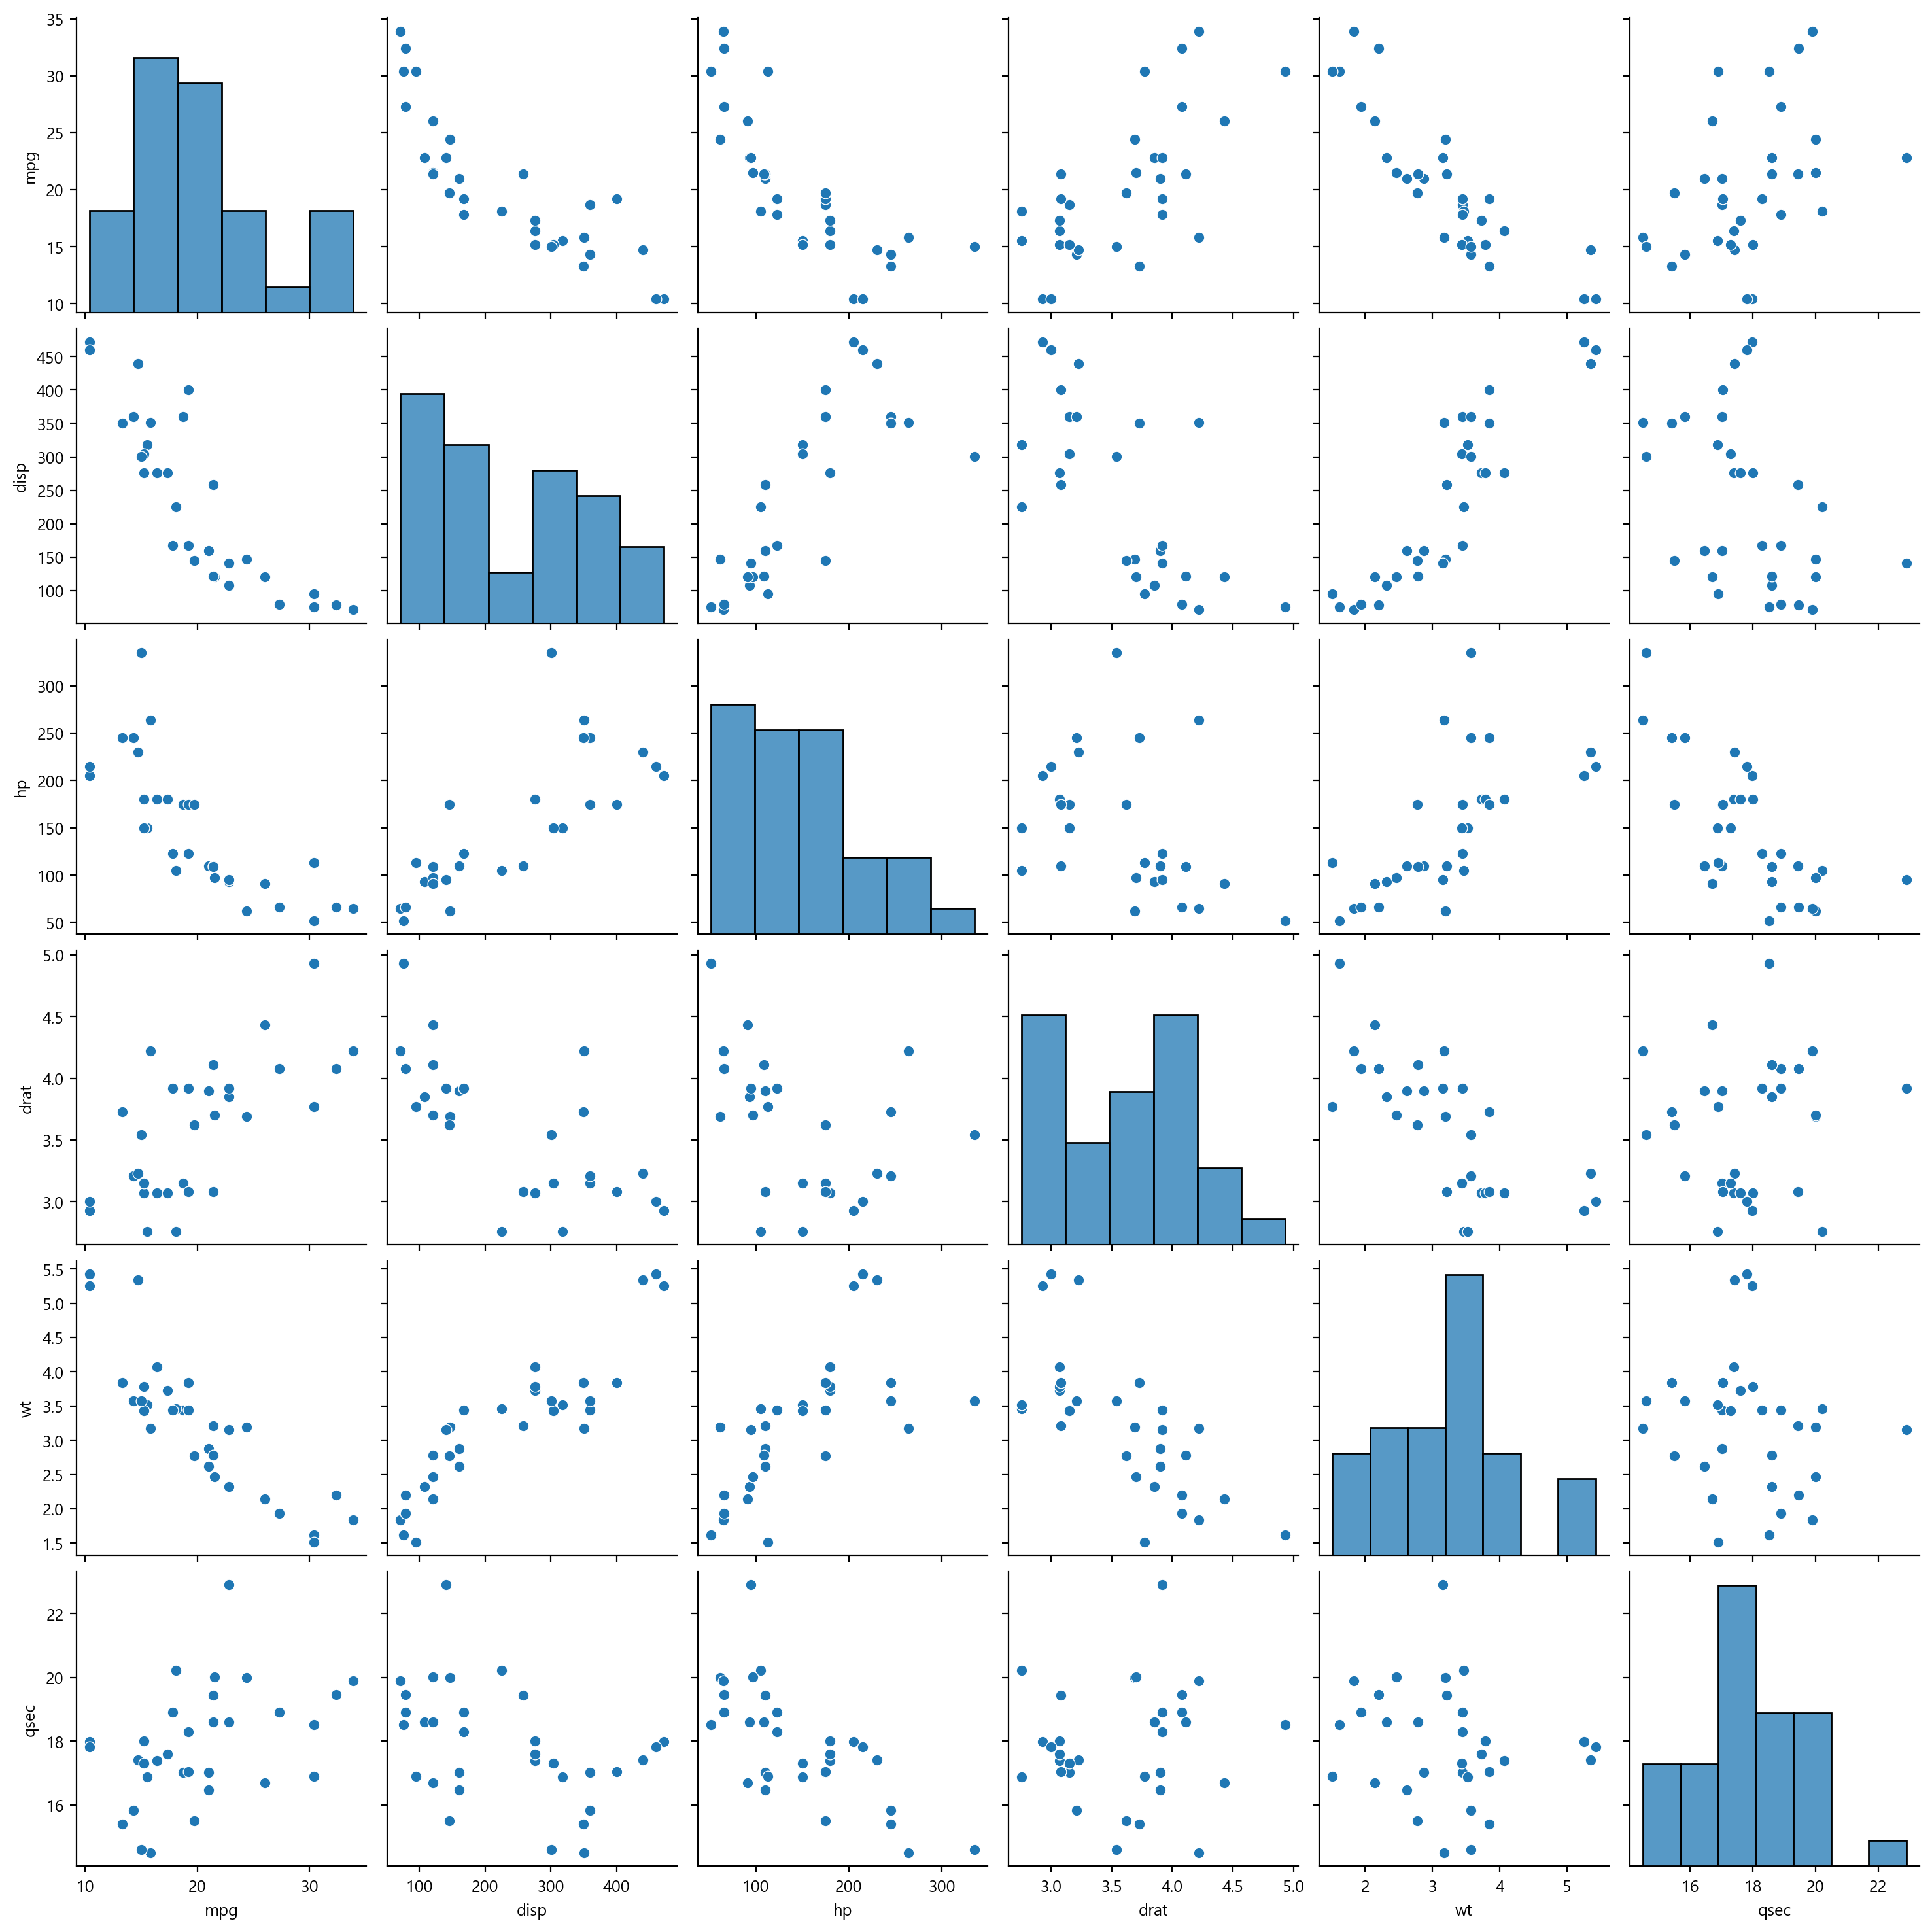

In [5]:
sb.pairplot(df)
plt.show()
plt.close()

### [2] 파라미터 설정

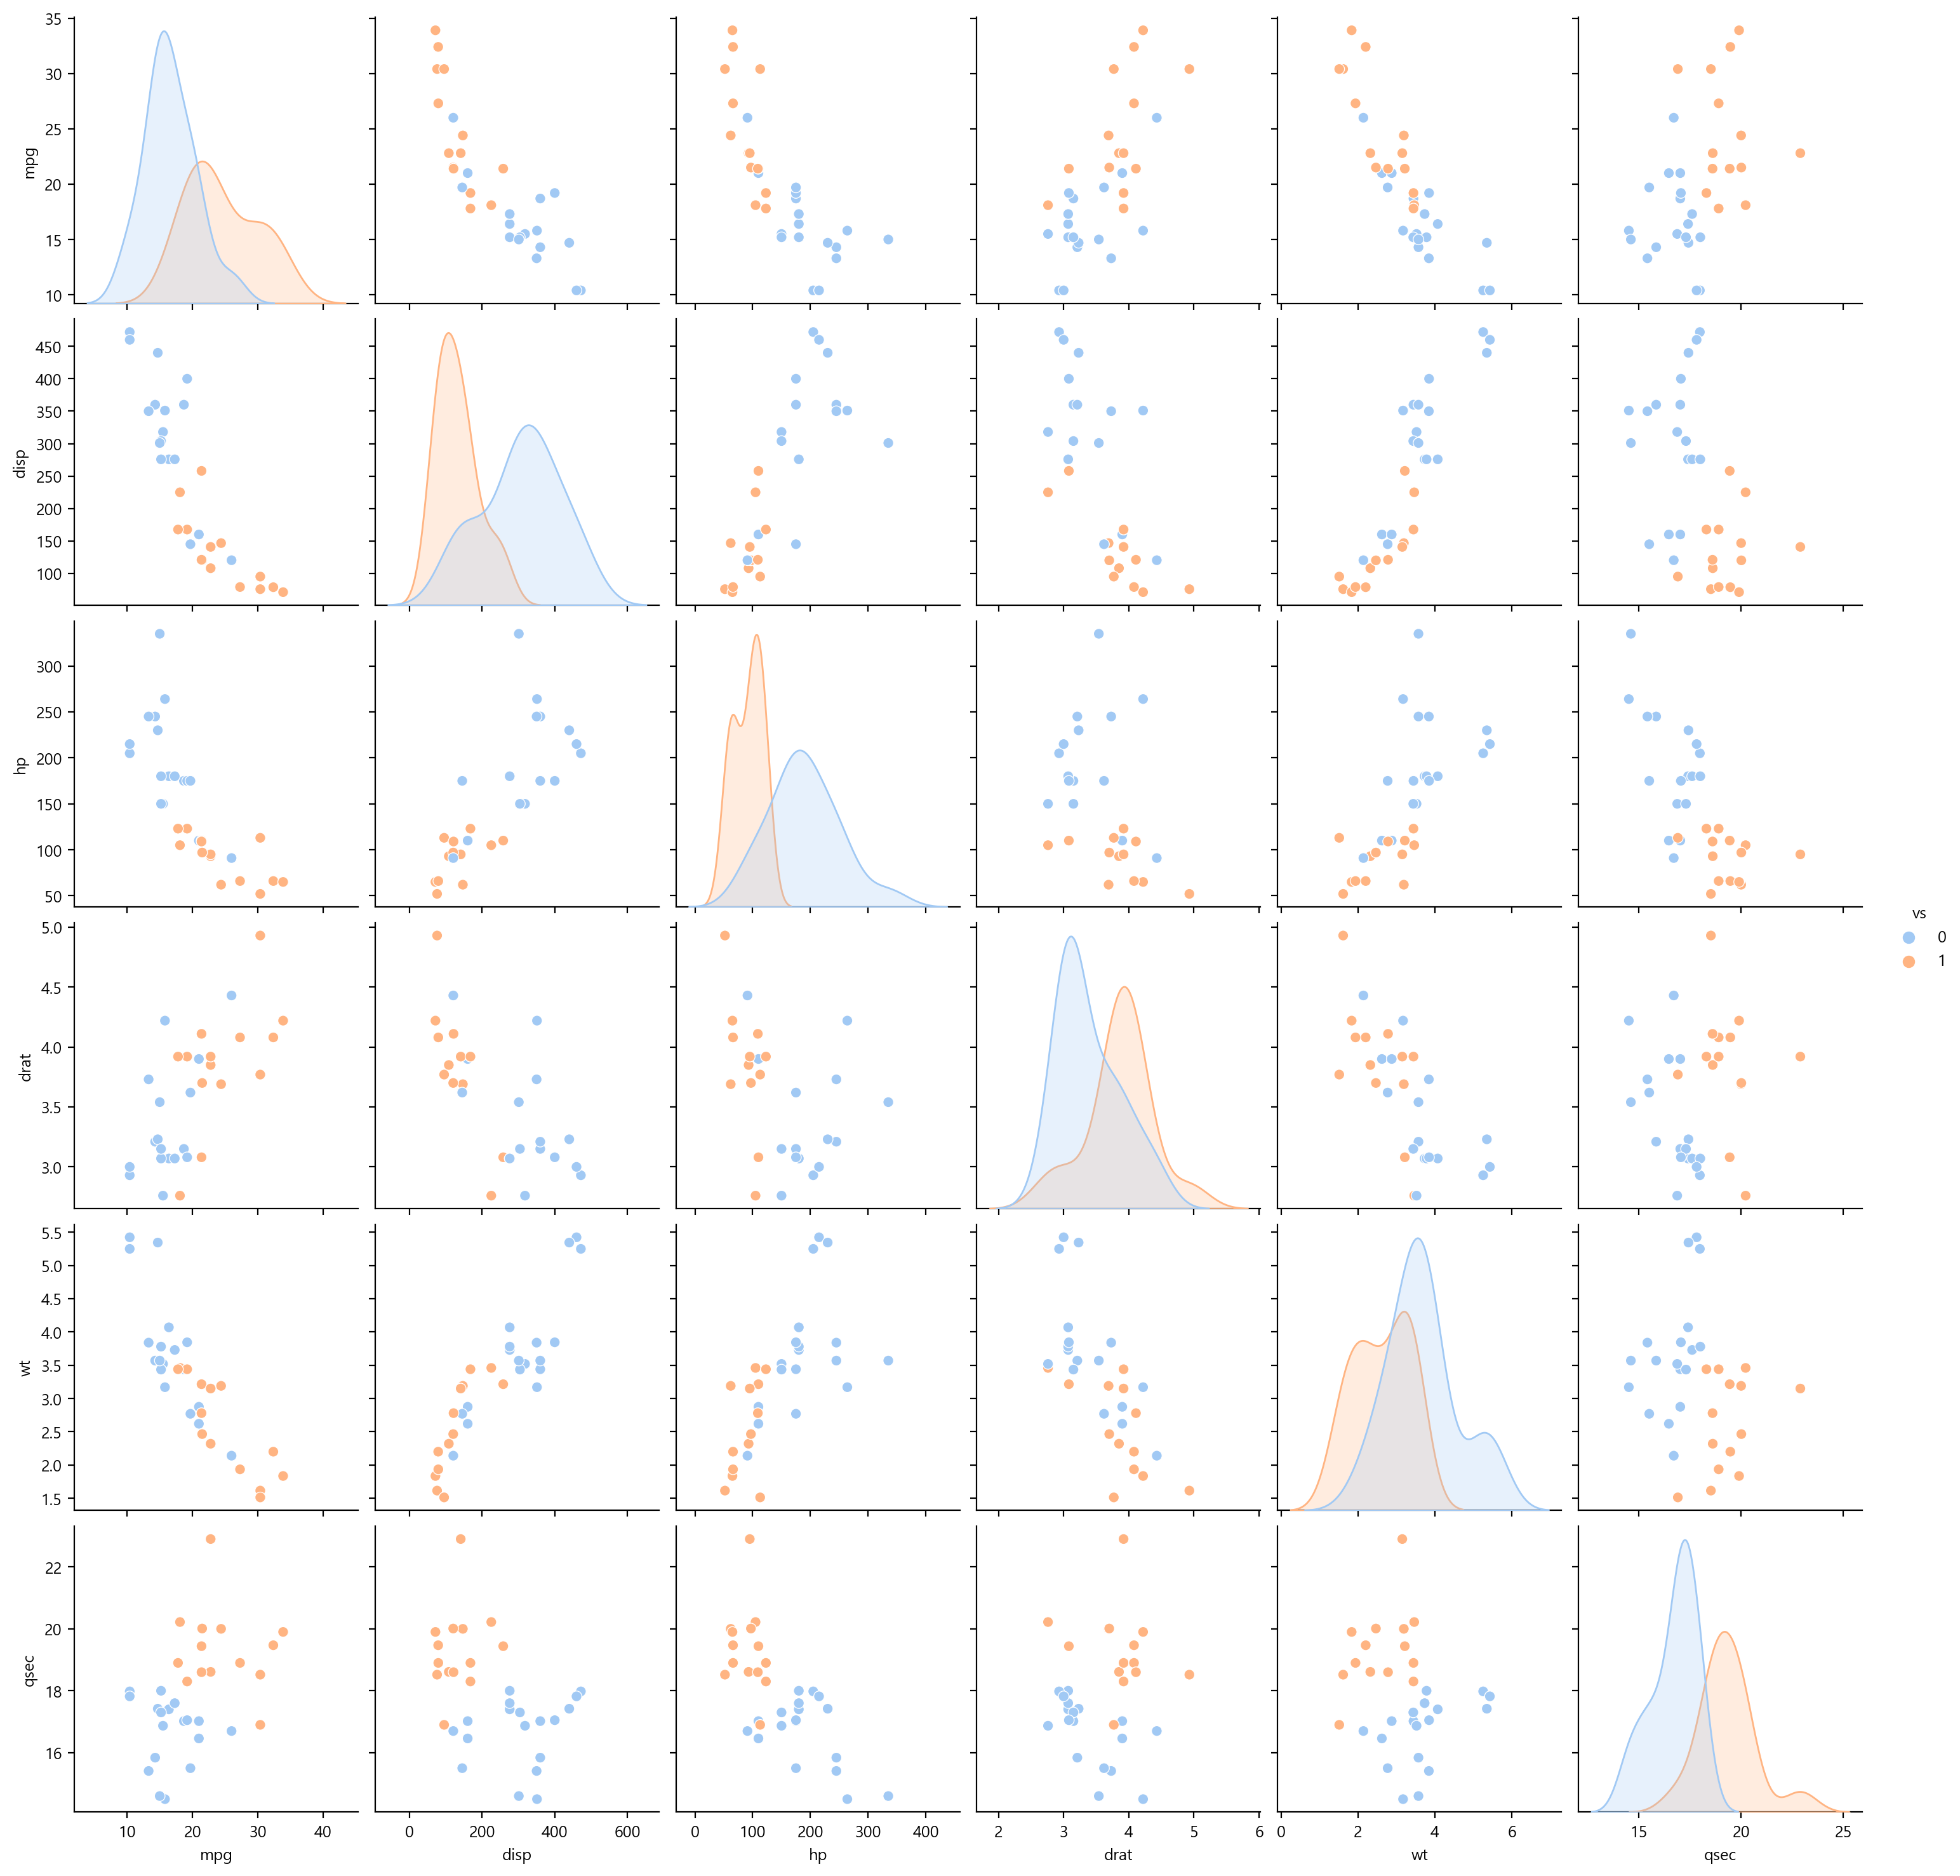

In [6]:
sb.pairplot(df,
            diag_kind='kde',    # 대각선에 커널밀도분포 표시
            hue='vs',           # 범주별 색상 구분
            palette='pastel'    # pastel, bright, deep, muted, colorblind, dark
)
plt.show()
plt.close()

### [3] 대각선 기준 다르게 표현하기

- 대각선 위 : 2차원 밀도함수 + 추세선
- 대각선 아래 : 2차원 밀도함수 + 산포도

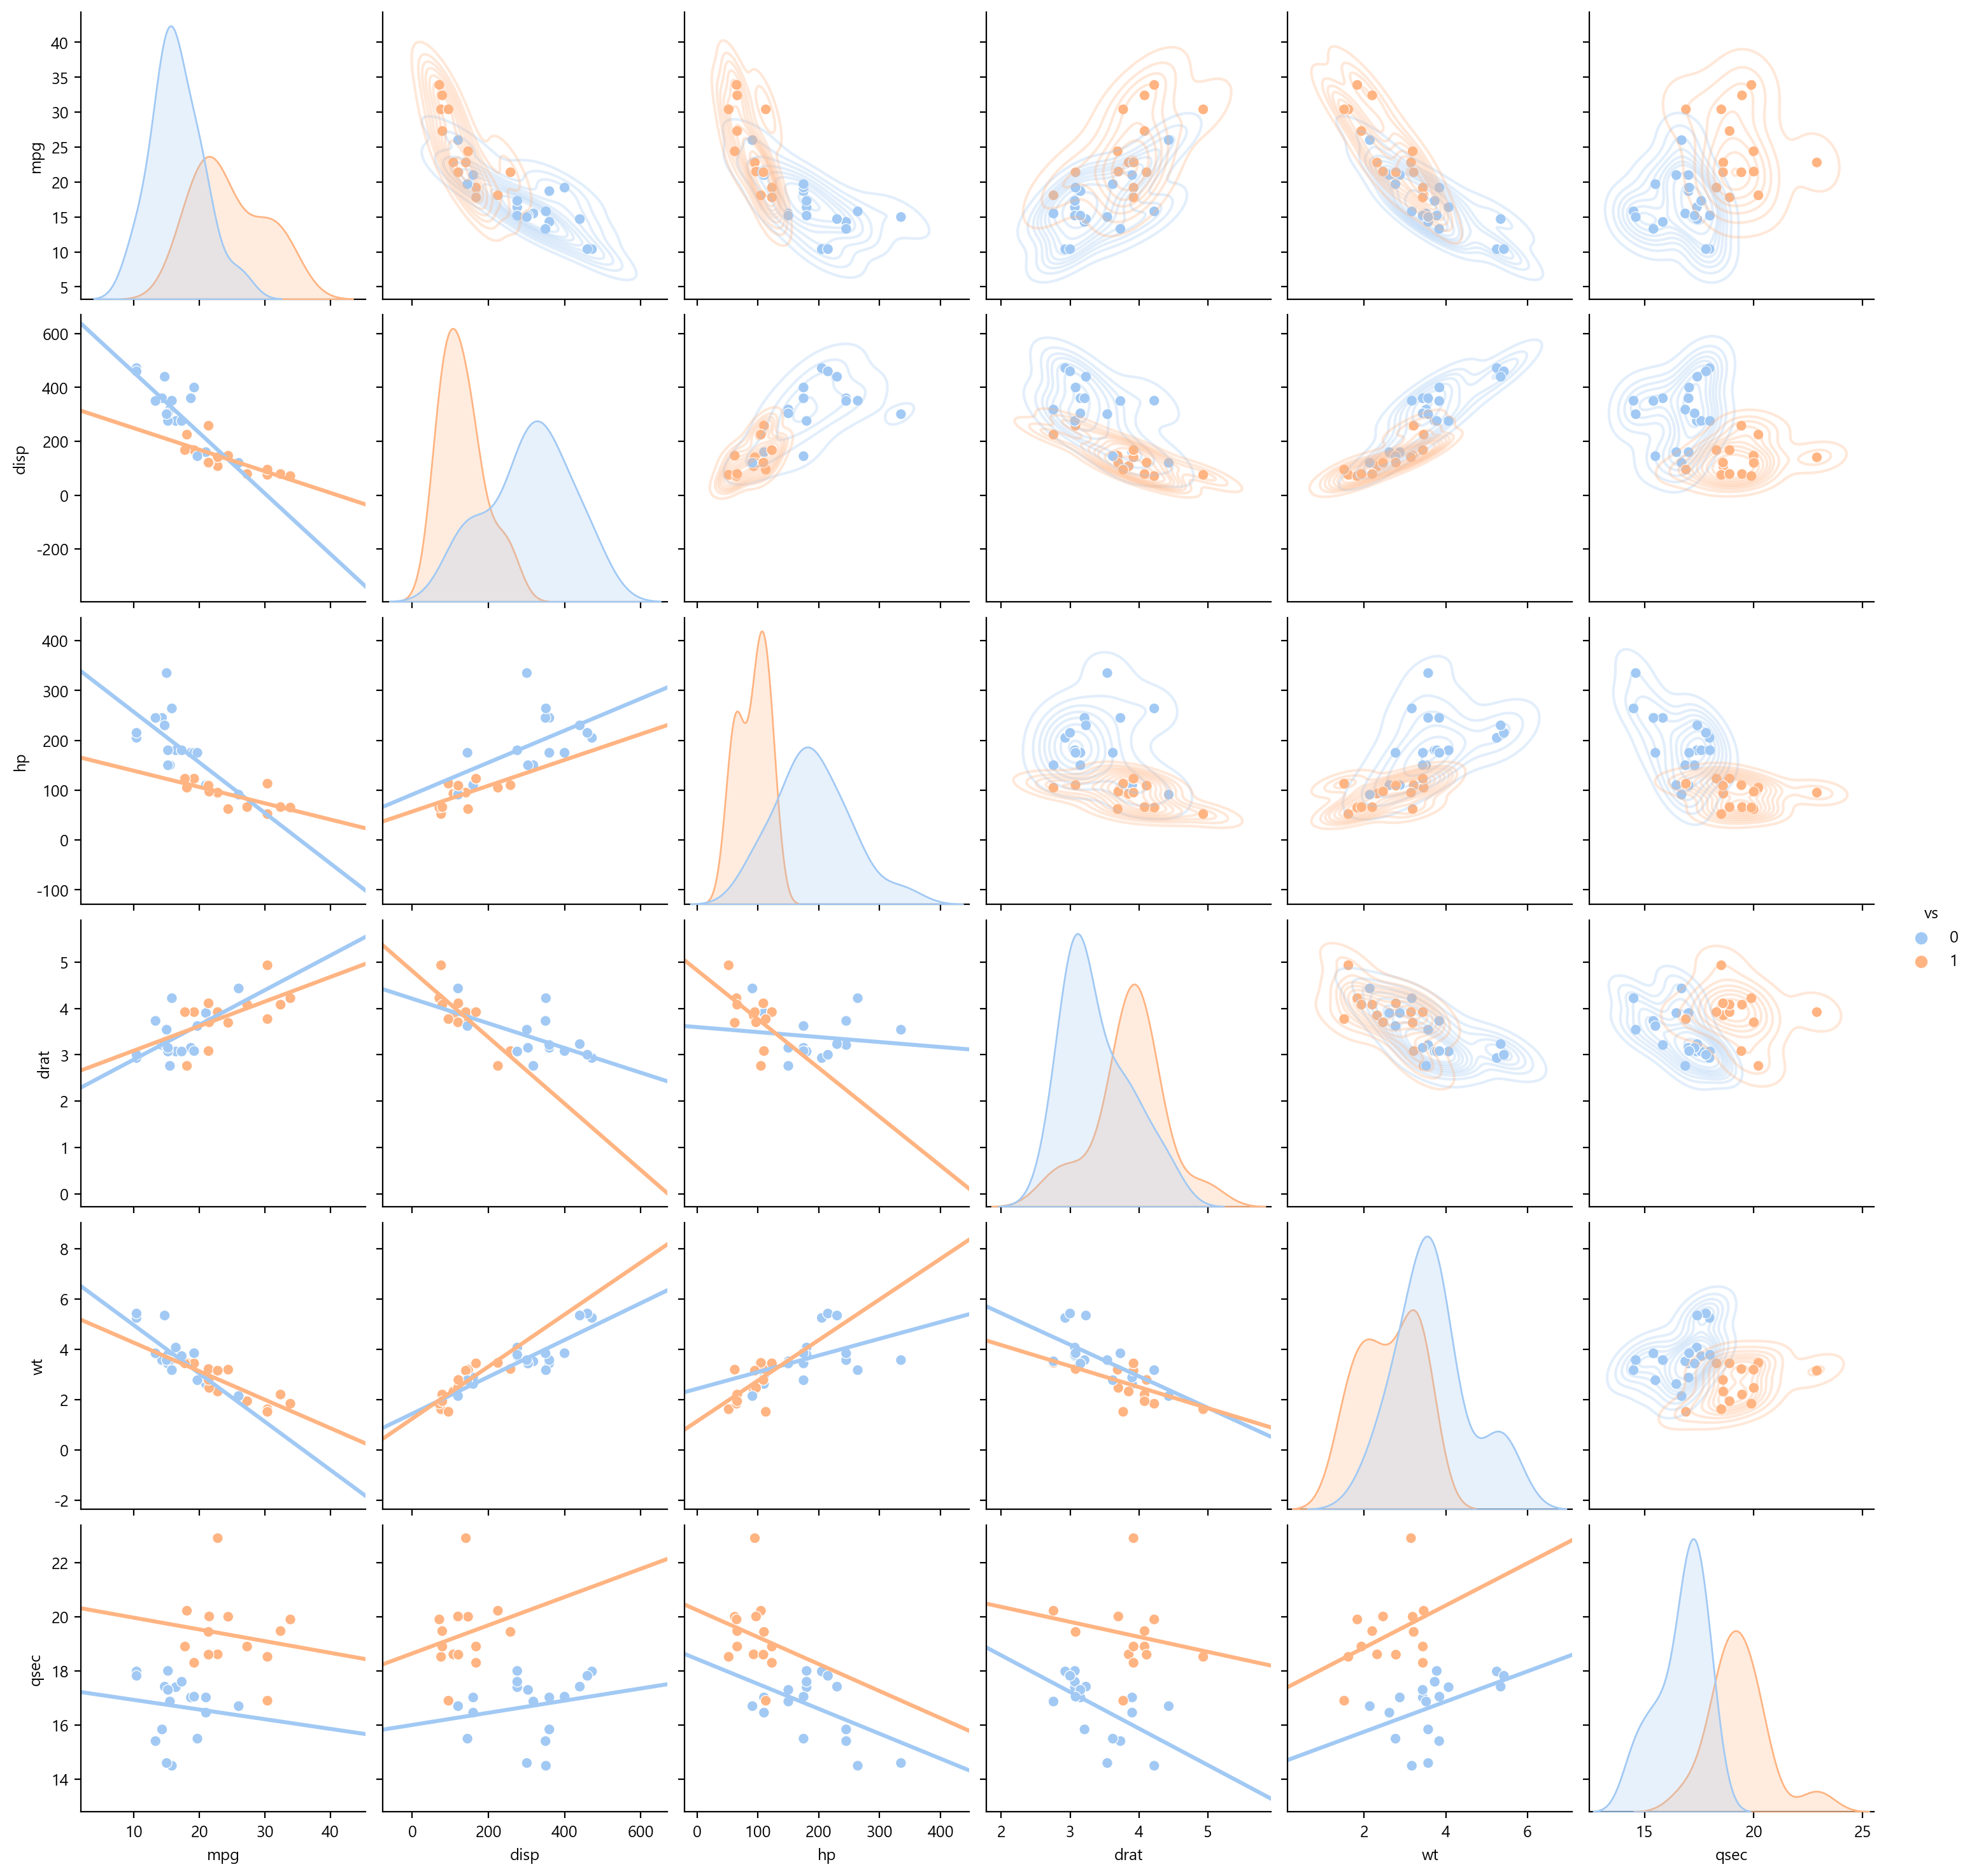

In [7]:
g = sb.pairplot(df,
              diag_kind='kde',  # 대각선에 커널밀도분포 표시
              hue='vs',  # 범주별 색상 구분
              palette='pastel'
)

# 대각선 위쪽에는 커널밀도추정, 아래쪽에는 회귀선 표시
g.map_upper(sb.kdeplot, alpha=0.3)
g.map_lower(sb.regplot, scatter=False, truncate=False, ci=False)

plt.show()
plt.close()

### [4] 상관계수, p-value 넣어주기 (기타)

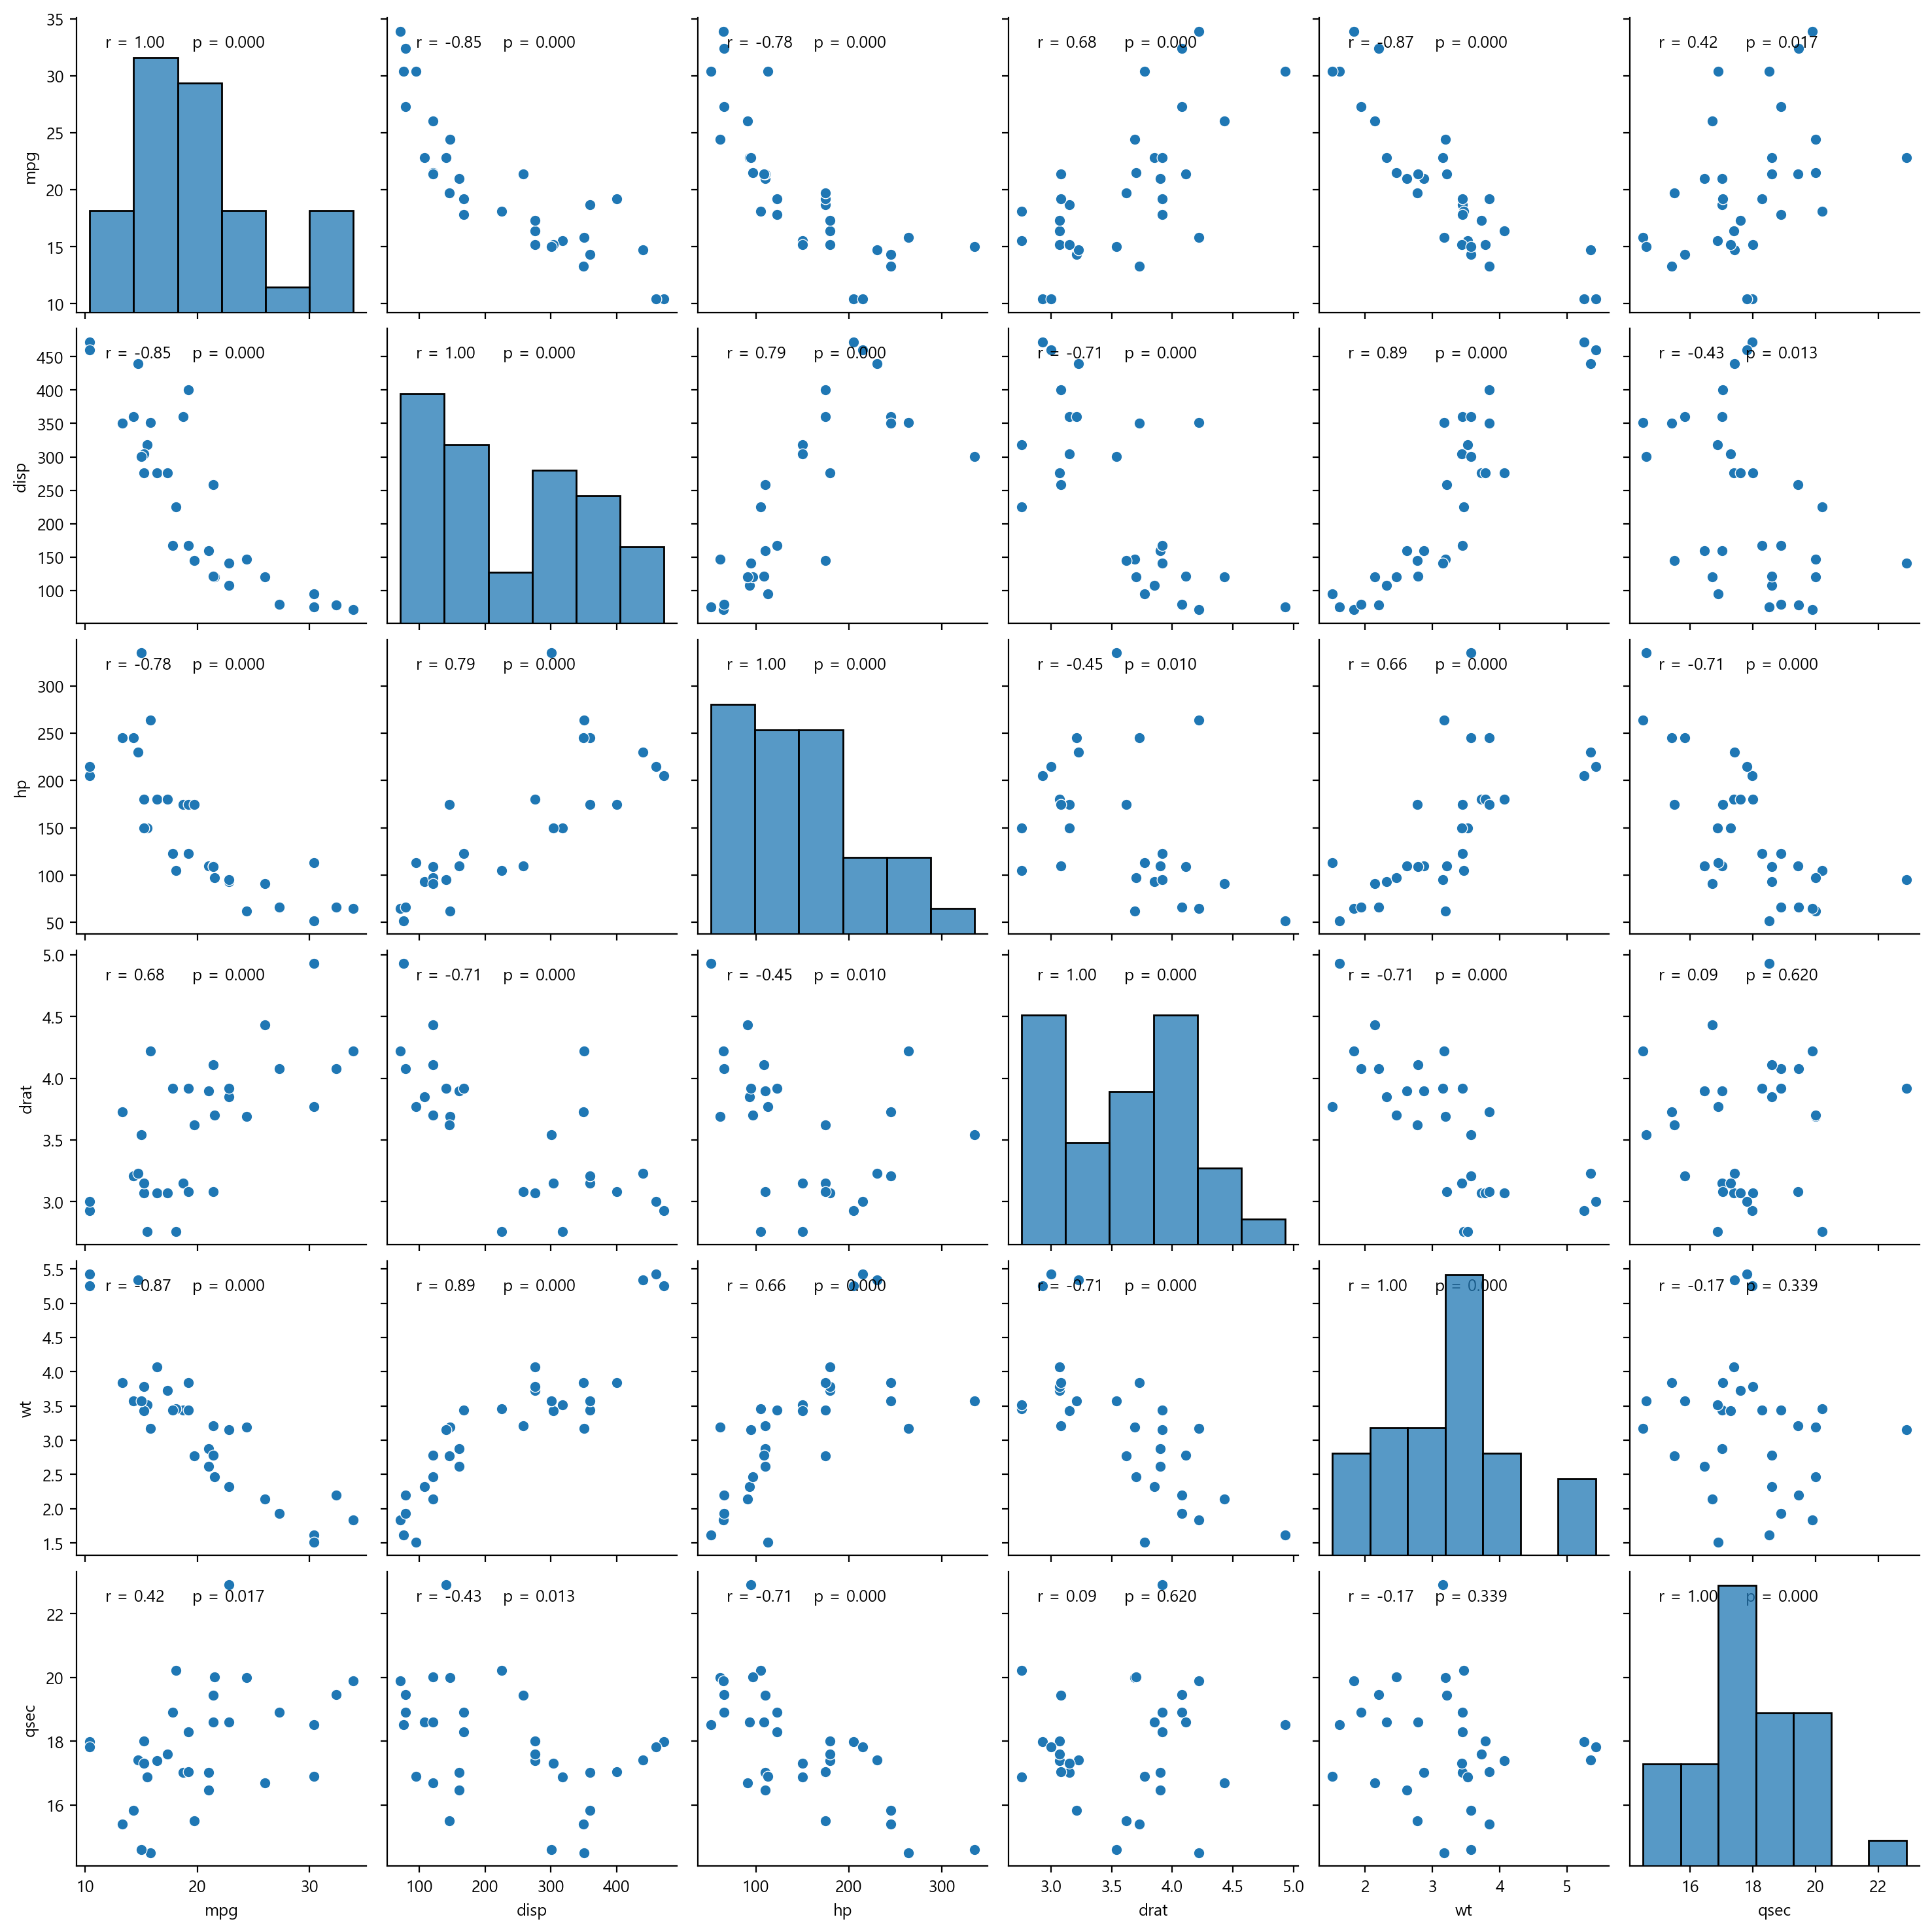

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    r, p = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)


graph = sb.pairplot(df)
graph.map(corrfunc)
plt.show()

## #04. 상관계수 행렬

### [1] 상관계수 행렬 생성

여러 개의 변수를 갖는 데이터프레임에 대해서도 사용 가능

In [14]:
df2 = df.drop('vs', axis=1)
corr = df2.corr(method='pearson')
corr

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


### [2] 상관계수 행렬 시각화

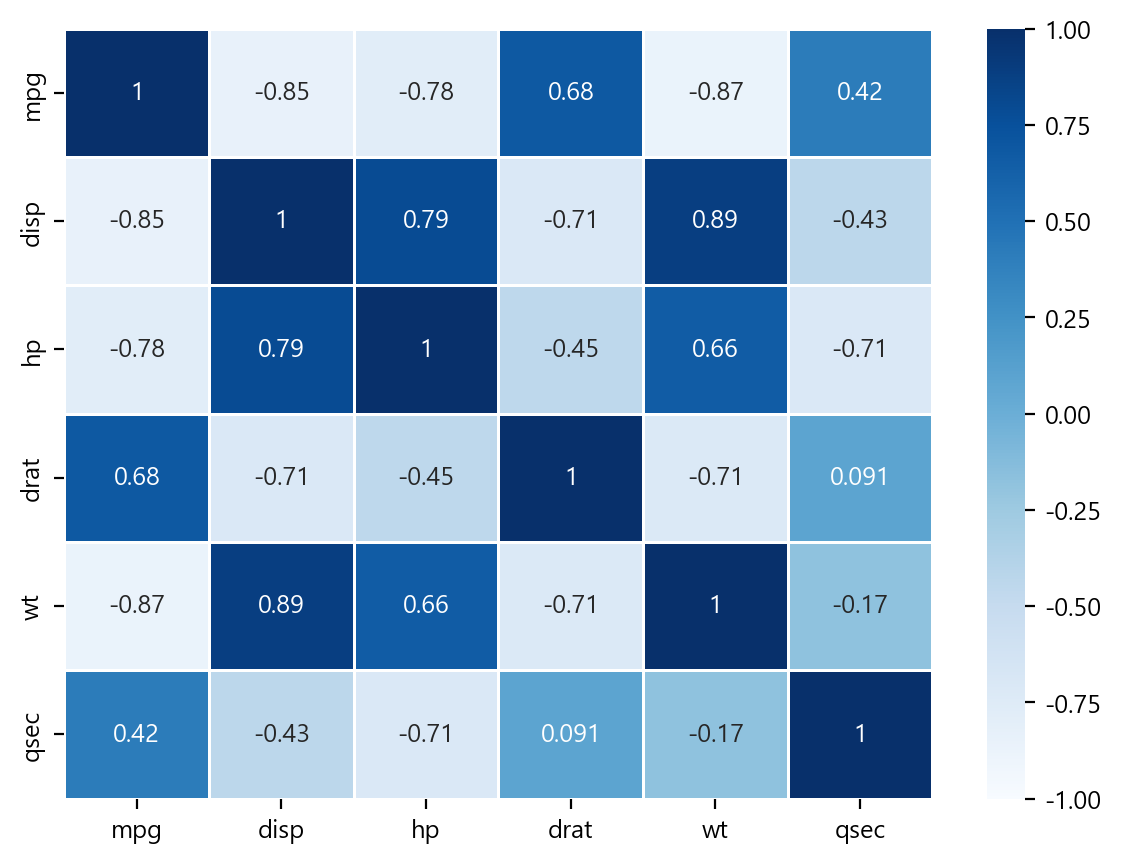

In [15]:
plt.figure(figsize=(7,5), dpi=200)
sb.heatmap(df2.corr(method='pearson'), annot = True, cmap = 'Blues',
           vmin = -1, vmax=1, linewidths=0.5)
plt.show()
plt.close()


### [3] 상관계수 행렬 시각화 (p value 추가)

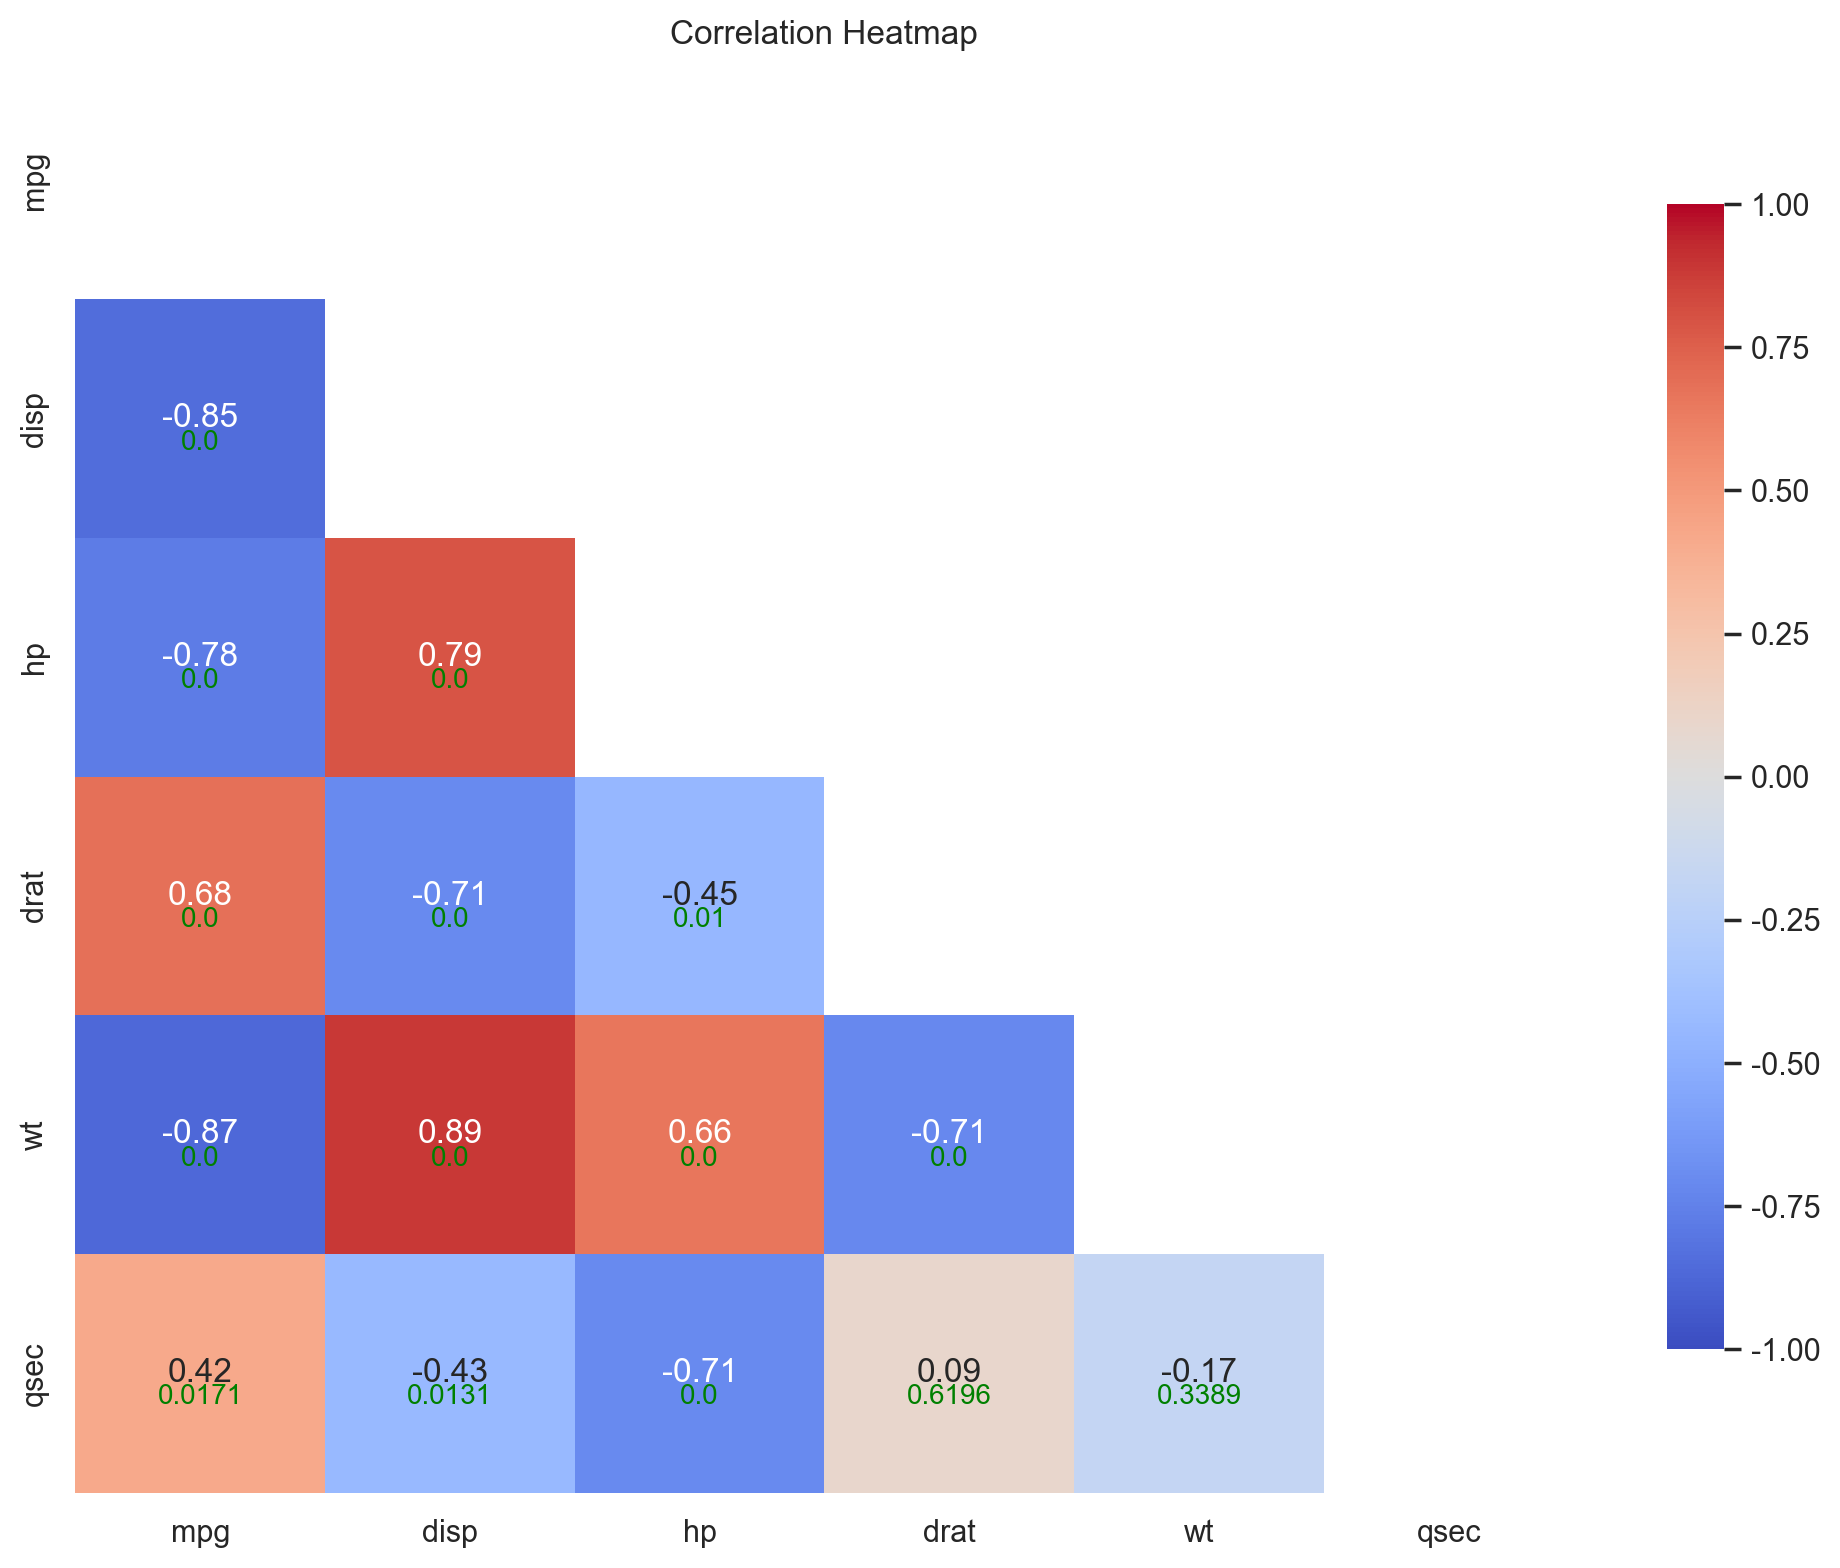

In [17]:

# Calculate the correlation matrix using Pearson correlation coefficients
corr_matrix = df.corr(method='pearson')

# Calculate the p-values for the correlation coefficients
pvalues = round(df.corr(method=lambda x, y: pearsonr(x, y)[1]), 4)

# Generate the heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sb.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, cbar_kws={'shrink': 0.8},
            ax=ax, vmin=-1, vmax=1, center=0)

# Update the heatmap labels with correlation coefficients and p-values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i >= j:
            continue
        corr = '{:f}'.format(corr_matrix.iloc[i, j]),
        pval = pvalues.iloc[i, j]
        ax.text(j+0.5, i+0.5, corr, ha='center', va='center', fontsize=10, color='white')
        ax.text(i+0.5, j+0.6, pval, ha='center', va='center', fontsize=10, color='green')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close()

## #05. 분석결과 검정

### [1] 개별 피어슨 상관 분석 수행

In [18]:
s, p = pearsonr(df2['mpg'], df2['disp'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['disp'], df2['hp'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['hp'], df2['drat'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['drat'], df2['wt'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['wt'], df2['qsec'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['qsec'], df2['mpg'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

statistic: -0.848, p-value: 0.000, 대립가설 채택
statistic: 0.791, p-value: 0.000, 대립가설 채택
statistic: -0.449, p-value: 0.010, 대립가설 채택
statistic: -0.712, p-value: 0.000, 대립가설 채택
statistic: -0.175, p-value: 0.339, 귀무가설 채택
statistic: 0.419, p-value: 0.017, 대립가설 채택


### [2] 반복문을 통한 일괄 검정

In [19]:
names = df2.columns
n = len(names)
pv = 0.05

data = []

for i in range(0, n):
    # 기본적으로 i 다음 위치를 의미하지만 i가 마지막 인덱스일 경우 0으로 설정
    j = i + 1 if i < n - 1 else 0

    fields = names[i] + ' vs ' + names[j]
    s, p = pearsonr(df2[names[i]], df2[names[j]])
    result = p <= pv

    data.append({'fields': fields, 'statistic': s, 'pvalue': p, 'result': result})

rdf = DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf

,statistic,pvalue,result
fields,,,
mpg vs disp,-0.847551,9.380327e-10,True
disp vs hp,0.790949,7.142679e-08,True
hp vs drat,-0.448759,9.988772e-03,True
drat vs wt,-0.712441,4.784260e-06,True
wt vs qsec,-0.174716,3.388683e-01,False
qsec vs mpg,0.418684,1.708199e-02,True
